# References:

Use `pip install python-pptx` to install the library.

Tutorial on how to use the `pptx` library:
https://towardsdatascience.com/use-python-to-automate-the-powerpoint-update-4a385acf1243 

Full documentation:
https://python-pptx.readthedocs.io/en/latest/#user-guide

**Before you get started here, open the PPT file and see what will change.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# for writing ppt
from pptx import Presentation
import os

# Open file

In [2]:
## Make sure the PPT file is closed BEFORE OPENING!
report_ppt = Presentation('template.pptx')

## Understand what goes in each slide

In [3]:
first_slide = report_ppt.slides[0]

In [4]:
shapes = first_slide.shapes

`shapes` is a vector containing several shapes

In [5]:
for shape in shapes:
    print(shape.shape_type,":", shape.name)

TEXT_BOX (17) : title_first_slide_to_edit
TEXT_BOX (17) : add_numbers_here
AUTO_SHAPE (1) : rectangle_to_delete


Where do these names come from? In PPT, in the Shape Format > Arrange tab, there is a **Selection Pane**. Clicking on it will show all variables, and clicking on each variable allows us to change its name. Give it a try.

This is how, on my template, I gave all objects specific names. This is the equivalent of picking good names for your variablers in code.

# Editing contents

There are three things we can do:
1. Delete existing shapes
2. Create new shapes
3. Edit current shapes

For the first slide, we want to:
* Delete a rectange
* Edit title
* Edit one text box

## Delete rectangle

In [6]:
for shape in shapes:
    if shape.name == 'rectangle_to_delete':
        shapes.element.remove(shape.element)

In [7]:
# Check that it has been removed:
for shape in shapes:
    print(shape.shape_type,":", shape.name)

TEXT_BOX (17) : title_first_slide_to_edit
TEXT_BOX (17) : add_numbers_here


## Edit title

In [8]:
for shape in shapes:
    if shape.name == 'title_first_slide_to_edit':
        paragraph = shape.text_frame.paragraphs[0]
        
        # print old text
        print("Previous title:", paragraph.runs[0].text)
        
        # edit title
        paragraph.runs[0].text = "New, completely original title"

Previous title: This is my presentation template. This title, by the way, will be edited!


## Edit text box

In [9]:
for shape in shapes:
    if shape.name == 'add_numbers_here':
        paragraph = shape.text_frame.paragraphs[0]
        
        # print old text
        print("Previous content:", paragraph.runs[0].text)
        
        # edit content
        paragraph.runs[0].text = f"Adding a randomly generated number here: {np.random.randn()}"

Previous content: In this box there will be some new with numbers


# Next slide

In [10]:
second_slide = report_ppt.slides[1]
shapes_ = second_slide.shapes

for shape in shapes_:
    print(shape.shape_type,":", shape.name)

TEXT_BOX (17) : TextBox 3
TEXT_BOX (17) : TextBox 4
AUTO_SHAPE (1) : Placeholder_1
TEXT_BOX (17) : TextBox 1
PICTURE (13) : Picture 7
AUTO_SHAPE (1) : Rectangle 8


## Delete placeholder and add a matplotlib plot there

### Create plot: create and save to PNG

In [11]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)+ 0.1* np.random.randn(len(x))

#### Attention: save the figure before you show it with `plt.show()`!!

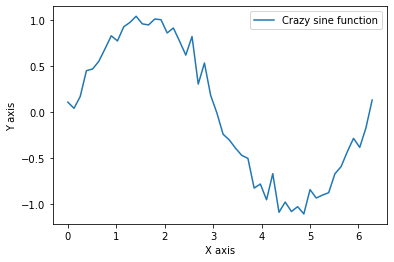

In [12]:
fig, ax = plt.subplots()
ax.plot(x,y, label='Crazy sine function')
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
plt.legend()
plt.savefig("Outputs/my_plot.png")
plt.show()

You might sometimes need need the figure size (in inches) to plot it:

In [13]:
fig.get_size_inches()

array([6., 4.])

But for now it's OK

### Add to PPT

In [14]:
from pptx.util import Cm, Inches

Getting the coordinates correctly might require some trial and error:

In [15]:
new_pic = second_slide.shapes.add_picture("Outputs/my_plot.png", left=Cm(0.40), top=Cm(7.8))

### Delete placeholder

In [16]:
for shape in shapes_:
    if shape.name == 'Placeholder_1':
        shapes_.element.remove(shape.element)

# Save new presentation

We would like to add today's date to the file's name

In [17]:
today = pd.to_datetime('now').strftime("%Y-%m-%d")
print(today)

2022-01-25


In [18]:
report_ppt.save(f'Outputs/New report {today}.pptx')

# Stop kernel to exit PPT

In [ ]:
os._exit(00)